!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
import tensorflow as tf
import os

2024-04-20 00:32:26.685909: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 00:32:26.688936: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 00:32:26.729100: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 00:32:27.328649: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2024-04-20 00:32:27.738066: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 00:32:27.738491: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
tf.config.list_physical_devices('GPU')

[]

Clear dataset images

In [4]:
import cv2
import imghdr

/tmp/ipykernel_45143/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = '/home/cody/Code/Python/ML/cnn_model/dataset/cats'

Checking for rust

In [6]:
#  no clear)))

Load data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('/home/cody/Code/Python/ML/cnn_model/dataset/') # RESIZE AND CLEAR

Found 341 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

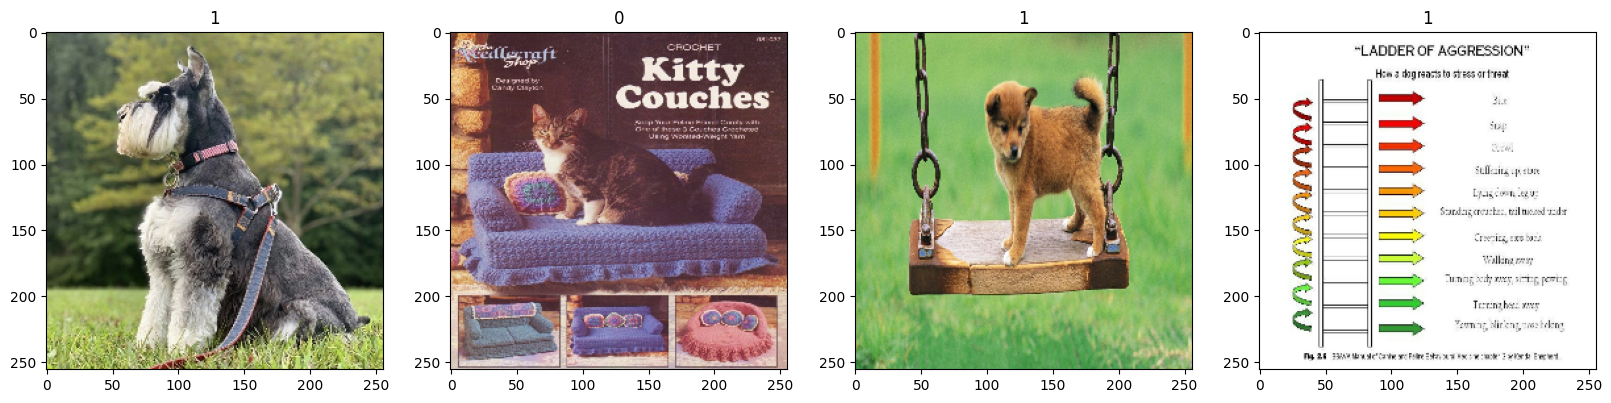

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale data

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[1.28714770e-01, 1.09106921e-01, 1.24793202e-01],
          [1.20952055e-01, 1.13108918e-01, 1.24881282e-01],
          [9.92915109e-02, 9.14483741e-02, 1.06345743e-01],
          ...,
          [6.94607854e-01, 5.29411793e-01, 3.41911763e-01],
          [6.98284328e-01, 5.33088207e-01, 3.45588237e-01],
          [6.83700979e-01, 5.18504918e-01, 3.31004888e-01]],
 
         [[1.20902270e-01, 1.01294421e-01, 1.16980702e-01],
          [1.34018838e-01, 1.26175702e-01, 1.45783544e-01],
          [1.16076902e-01, 1.08233765e-01, 1.27841607e-01],
          ...,
          [6.96775436e-01, 5.24226427e-01, 3.47755820e-01],
          [7.09731162e-01, 5.37182152e-01, 3.60711545e-01],
          [7.04285383e-01, 5.31736374e-01, 3.55265766e-01]],
 
         [[1.25237435e-01, 1.05629593e-01, 1.29159003e-01],
          [1.21449910e-01, 1.13587625e-01, 1.33233756e-01],
          [1.00647211e-01, 9.06096846e-02, 1.14606313e-01],
          ...,
          [6.77906692e-01, 5.01681209e-01, 3.2888

In [14]:
len(data)

11

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size, val_size, test_size

(7, 2, 1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

DEEP learning model

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/cody/Code/Python/ML/cnn_model/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
logdir='/home/cody/Code/Python/ML/cnn_model/log'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-04-20 00:33:02.853415: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2024-04-20 00:33:02.933305: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64000000 exceeds 10% of free system memory.
2024-04-20 00:33:03.032061: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64000000 exceeds 10% of free system memory.


1/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4688 - loss: 0.6962

2024-04-20 00:33:03.210099: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.
2024-04-20 00:33:03.210195: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 495ms/step - accuracy: 0.4860 - loss: 0.8780 - val_accuracy: 0.5469 - val_loss: 0.6887
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.5371 - loss: 0.6915 - val_accuracy: 0.5469 - val_loss: 0.6801
Epoch 3/20


2024-04-20 00:33:09.769343: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - accuracy: 0.5315 - loss: 0.6798 - val_accuracy: 0.5781 - val_loss: 0.6785
Epoch 4/20


2024-04-20 00:33:13.234217: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - accuracy: 0.6393 - loss: 0.6801 - val_accuracy: 0.7031 - val_loss: 0.6744
Epoch 5/20


2024-04-20 00:33:16.650466: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 0.7086 - loss: 0.6773 - val_accuracy: 0.6406 - val_loss: 0.6463
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.6632 - loss: 0.6486 - val_accuracy: 0.5312 - val_loss: 0.6531
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - accuracy: 0.5890 - loss: 0.6508 - val_accuracy: 0.6875 - val_loss: 0.6083
Epoch 8/20


2024-04-20 00:33:28.535230: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.7280 - loss: 0.6019 - val_accuracy: 0.7812 - val_loss: 0.5374
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step - accuracy: 0.6759 - loss: 0.5789 - val_accuracy: 0.8438 - val_loss: 0.4540
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 514ms/step - accuracy: 0.8103 - loss: 0.4857 - val_accuracy: 0.7500 - val_loss: 0.4960
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.8555 - loss: 0.3916 - val_accuracy: 0.9375 - val_loss: 0.3446
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.9077 - loss: 0.3259 - val_accuracy: 0.8594 - val_loss: 0.3120
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - accuracy: 0.8976 - loss: 0.2762 - val_accuracy: 0.9219 - val_loss: 0.2442
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.9097 - loss: 0.2442 - val_accuracy: 0.9688 - val_loss: 0.1709
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 0.9380 - loss: 0.1779 - val_accuracy: 0.9844 - val_loss: 0.11

2024-04-20 00:34:03.915317: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 444ms/step - accuracy: 0.9858 - loss: 0.0807 - val_accuracy: 0.9844 - val_loss: 0.0494
Epoch 19/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - accuracy: 0.9947 - loss: 0.0385 - val_accuracy: 0.9844 - val_loss: 0.0476
Epoch 20/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.9694 - loss: 0.0920 - val_accuracy: 0.9844 - val_loss: 0.0727


In [26]:
hist.history

{'accuracy': [0.4866071343421936,
  0.5491071343421936,
  0.5357142686843872,
  0.6830357313156128,
  0.7008928656578064,
  0.6071428656578064,
  0.5892857313156128,
  0.6830357313156128,
  0.6875,
  0.8080357313156128,
  0.8482142686843872,
  0.8571428656578064,
  0.8839285969734192,
  0.9151785969734192,
  0.9375,
  0.9732142686843872,
  0.9553571343421936,
  0.9866071343421936,
  0.9910714030265808,
  0.9598214030265808],
 'loss': [0.8405441641807556,
  0.6901659369468689,
  0.6868195533752441,
  0.6815986037254333,
  0.6736966967582703,
  0.655218780040741,
  0.6503499150276184,
  0.6042131781578064,
  0.5580283999443054,
  0.4893047511577606,
  0.4024020731449127,
  0.37399861216545105,
  0.2958037555217743,
  0.24251051247119904,
  0.17238403856754303,
  0.11832492053508759,
  0.09620068967342377,
  0.07529193162918091,
  0.04688052088022232,
  0.10530147701501846],
 'val_accuracy': [0.546875,
  0.546875,
  0.578125,
  0.703125,
  0.640625,
  0.53125,
  0.6875,
  0.78125,
  0.843

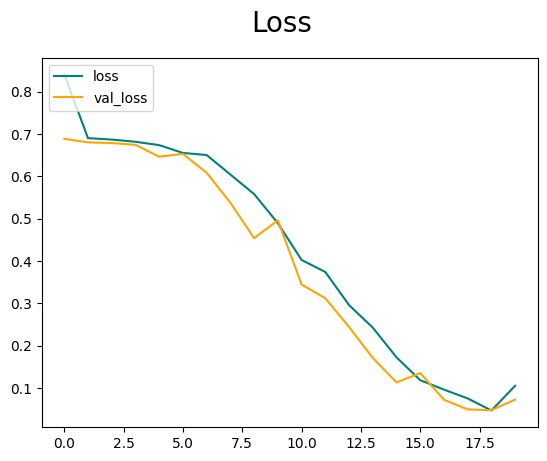

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

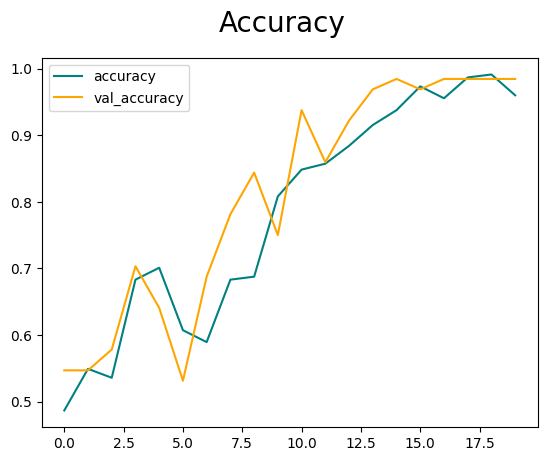

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [29]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


2024-04-20 00:38:11.874771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.88235295, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9375, shape=(), dtype=float32)


Testing

In [34]:
import cv2
path_to_cat = '/home/cody/Code/Python/ML/cnn_model/cat.jpg'

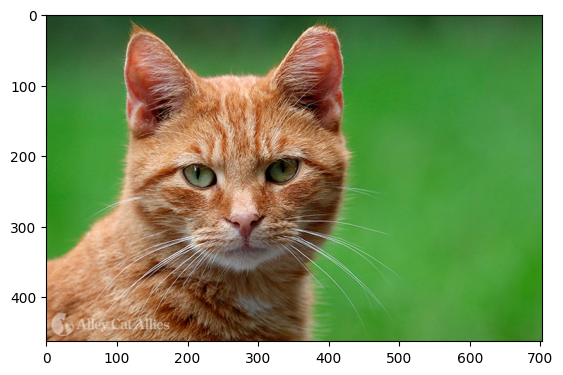

In [36]:
# img = cv2.imread(path_to_cat)
# plt.imshow(img)
# plt.show()

img = cv2.imread(path_to_cat)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

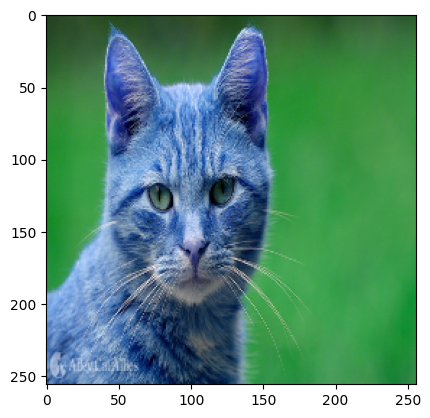

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
predict1 = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [41]:
predict1

array([[0.19684614]], dtype=float32)

In [44]:
path_to_dog = '/home/cody/Code/Python/ML/cnn_model/dog.jpg'

In [49]:
img = cv2.imread(path_to_cat)
resize_dog = tf.image.resize(img, (256,256))

In [50]:
predict2 = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [51]:
predict2

array([[0.4800845]], dtype=float32)

In [54]:
def pred(path):
    img = cv2.imread(path)
    resized = tf.image.resize(img, (256,256))
    prediction = model.predict(np.expand_dims(resized/255, 0))
    print(f'Prediction is {prediction}')
    return

In [55]:
pred('/home/cody/Code/Python/ML/cnn_model/dog2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction is [[0.801132]]
